# Keras - Convolutional Neural Network (CNN)

참조 블로그 : http://pythonkim.tistory.com/52

## CNN 으로 MNIST 분류하기

In [1]:
import keras

Using TensorFlow backend.


### MNIST 데이터 불러오기

In [2]:
from keras.datasets import mnist

In [3]:
import numpy as np
np.random.seed(777)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# 변수 설정
n_train, width, height = x_train.shape
n_test, _, _ = x_test.shape

In [6]:
# 데이터 확인

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

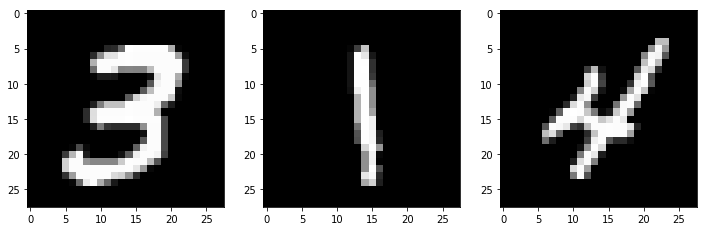

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(x_train[7,], cmap='gray')
plt.subplot(132)
plt.imshow(x_train[8,], cmap='gray')
plt.subplot(133)
plt.imshow(x_train[9,], cmap='gray')

### 데이터 전처리

### Input

In [9]:
input_shape = (width, height, 1)  # 흑백일 경우 1, 컬러이면 3

In [10]:
input_train = x_train.reshape(n_train, *input_shape)
input_train.shape

(60000, 28, 28, 1)

In [11]:
input_train.astype('float32')
input_train = input_train / 255.0
input_train.max()

1.0

In [12]:
# 테스트셋도 동일하게 처리

In [13]:
input_test = x_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / 255.0

### Output

In [14]:
output_train = keras.utils.to_categorical(y_train, 10)
output_test = keras.utils.to_categorical(y_test, 10)

In [15]:
output_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

## CNN

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [17]:
from keras.optimizers import SGD, Adagrad, Adadelta, Adam, Adamax, Nadam, RMSprop

* convolution layer : Conv2D(filter, kernel_size, activation, padding)
* padding : 'SAME' 또는 'VALID'. 패딩을 추가하는 공식의 차이. SAME은 출력 크기를 입력과 같게 유지.
* pooling의 다른 말은 sampling 또는 resizing이다. pooling은 모은다는 뜻이고, sampling은 고른다는 뜻이고, resizing은 크기를 바꾼다는 뜻이다. 어떤 작업을 하건 pooling을 거치면 크기가 작아진다는 것이 핵심이다.
* Max Pooling : 여러 개의 값 중에서 가장 큰 값을 꺼내서 모아 놓는 것을 뜻한다.

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))  
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)          16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

In [19]:
batch_size = 128
epochs = 2

Adam

In [50]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.fit(input_train, output_train,
          batch_size=batch_size,
          epochs=epochs)

score = model.evaluate(input_test, output_test, verbose=0)
score

Epoch 1/2
60000/60000 [==============================] - 261s - loss: 0.2466 - acc: 0.9233   
Epoch 2/2
60000/60000 [==============================] - 271s - loss: 0.0661 - acc: 0.9797   


[0.045664853578619657, 0.98470000000000002]

RMSprop

In [53]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

model.fit(input_train, output_train,
          batch_size=batch_size,
          epochs=epochs)

score = model.evaluate(input_test, output_test, verbose=0)
score

Epoch 1/2
60000/60000 [==============================] - 275s - loss: 0.0534 - acc: 0.9831   
Epoch 2/2
60000/60000 [==============================] - 280s - loss: 0.0373 - acc: 0.9884   


[0.030486961908440573, 0.98950000000000005]

Adagrad

In [54]:
adagrad = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=adagrad,
              metrics=['accuracy'])

model.fit(input_train, output_train,
          batch_size=batch_size,
          epochs=epochs)

score = model.evaluate(input_test, output_test, verbose=0)
score

Epoch 1/2
60000/60000 [==============================] - 279s - loss: 0.0502 - acc: 0.9896   
Epoch 2/2
60000/60000 [==============================] - 290s - loss: 0.0164 - acc: 0.9950   


[0.025779432585382893, 0.99170000000000003]

Adadelta

In [21]:
adadelta = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=adadelta,
              metrics=['accuracy'])

model.fit(input_train, output_train,
          batch_size=batch_size,
          epochs=epochs)

score = model.evaluate(input_test, output_test, verbose=0)
score

Epoch 1/2
60000/60000 [==============================] - 303s - loss: 0.0587 - acc: 0.9823   
Epoch 2/2
60000/60000 [==============================] - 303s - loss: 0.0456 - acc: 0.9863   


[0.042560313801467416, 0.98599999999999999]

Adamax

In [20]:
adamax = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=adamax,
              metrics=['accuracy'])

model.fit(input_train, output_train,
          batch_size=batch_size,
          epochs=epochs)

score = model.evaluate(input_test, output_test, verbose=0)
score

Epoch 1/2
60000/60000 [==============================] - 304s - loss: 0.2768 - acc: 0.9172   
Epoch 2/2
60000/60000 [==============================] - 310s - loss: 0.0846 - acc: 0.9746   


[0.056937176718609407, 0.98309999999999997]